In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting images
from keras.datasets import mnist  # For loading the MNIST dataset
from keras.models import Model  # To create the autoencoder model
from keras.layers import Input, Dense  # Layers to define the autoencoder structure

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()  # We use only the training images and ignore labels

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / 255.0  # Convert to float and scale
x_test = x_test.astype('float32') / 255.0  # Same for test set

# Reshape images to a 2D array (samples, pixels)
x_train = x_train.reshape((len(x_train), -1))  # Flatten to 784 dimensions
x_test = x_test.reshape((len(x_test), -1))  # Flatten

In [9]:
# Function to add noise to images
def add_noise(images, noise_factor=0.5):
    # Create random noise
    noise = noise_factor * np.random.normal(size=images.shape)  # Generate random noise
    noisy_images = images + noise  # Add noise to original images
    noisy_images = np.clip(noisy_images, 0.0, 1.0)  # Keep pixel values between 0 and 1
    return noisy_images  # Return noisy images

# Add noise to the training images
x_train_noisy = add_noise(x_train)  # Create noisy training images
# Add noise to the test images
x_test_noisy = add_noise(x_test)  # Create noisy test images

In [10]:
# Define the input layer with 784 input dimensions (28x28 images flattened)
input_img = Input(shape=(784,))  # Input layer

# Encoder layer
encoded = Dense(64, activation='relu')(input_img)  # Compress input to 64 dimensions

# Decoder layer
decoded = Dense(784, activation='sigmoid')(encoded)  # Reconstruct the image to 784 dimensions

# Create the autoencoder model
autoencoder = Model(input_img, decoded)  # Define the model with input and output

In [11]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Use Adam optimizer and binary crossentropy loss

In [12]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,  # Train with noisy images as input and clean images as target
                epochs=20,  # Number of training epochs
                batch_size=256,  # Number of samples per gradient update
                validation_data=(x_test_noisy, x_test))  # Validate on noisy test images

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3370 - val_loss: 0.1891
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1806 - val_loss: 0.1585
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1555 - val_loss: 0.1418
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1403 - val_loss: 0.1327
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1325 - val_loss: 0.1271
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1271 - val_loss: 0.1233
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1235 - val_loss: 0.1207
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1211 - val_loss: 0.1188
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1193 - val_loss: 0.1176
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1176 - val_loss: 0.1167
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1169 - val_loss: 0.1154
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
# Denoise the test images
denoised_images = autoencoder.predict(x_test_noisy)  # Predict clean images from noisy input

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


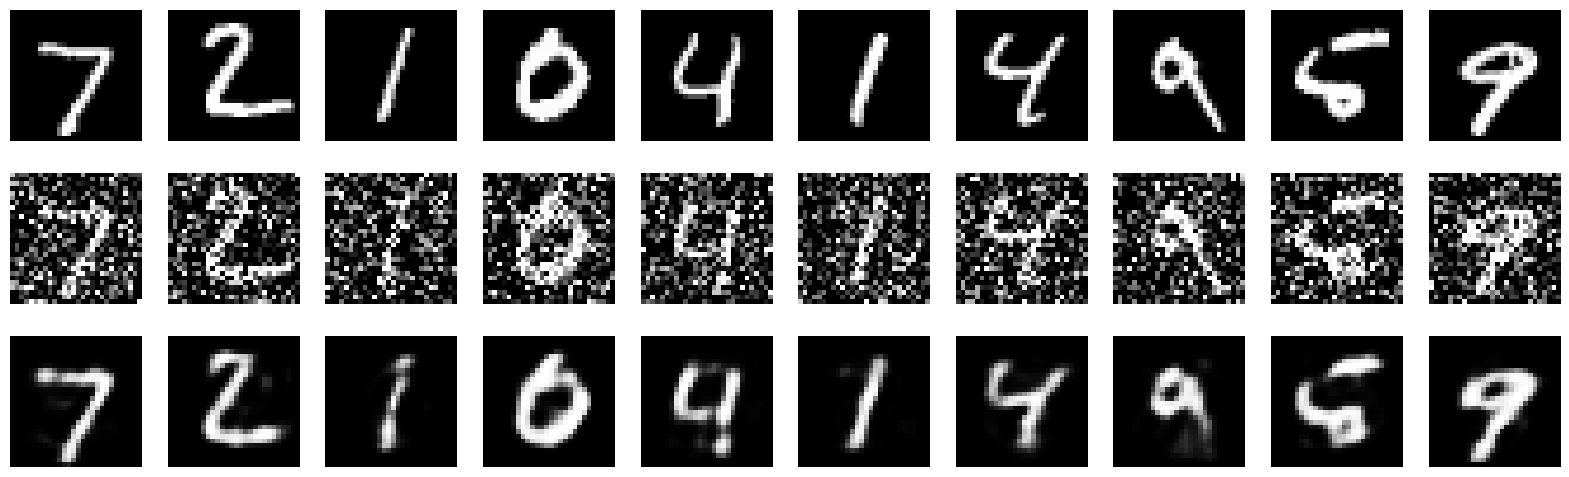

In [14]:
# Plot original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))

# Display original images
for i in range(n):
    plt.subplot(3, n, i + 1)  # 3 rows, n columns
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Original image
    plt.axis('off')

# Display noisy images
for i in range(n):
    plt.subplot(3, n, i + 1 + n)  # Shift to next row
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')  # Noisy image
    plt.axis('off')

# Display denoised images
for i in range(n):
    plt.subplot(3, n, i + 1 + 2 * n)  # Shift to next row
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')  # Denoised image
    plt.axis('off')

plt.show()  # Show the plots
